In [2]:
import json
import geojson
from shapely.geometry import shape

o = {
   "coordinates": [[[23.314208, 37.768469], [24.039306, 37.768469], [24.039306, 38.214372], [23.314208, 38.214372], [23.314208, 37.768469]]], 
   "type": "Polygon"
}

s = json.dumps(o)

# Convert to geojson.geometry.Polygon
g1 = geojson.loads(s)

# Feed to shape() to convert to shapely.geometry.polygon.Polygon
# This will invoke its __geo_interface__ (https://gist.github.com/sgillies/2217756)
g2 = shape(g1)

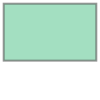

In [3]:
g2

In [6]:
f = open(r'K:\OneDrive_NJIT\OneDrive - NJIT\Research\House\maryland\footprints\buildings2.geojson', 'r')
buildings = geojson.load(f)

In [7]:
len(buildings)

2

In [8]:
len(buildings[0])

4

In [9]:
len(buildings[1])

4

In [ ]:
len(buildings['features'])

In [24]:
features = buildings['features']

In [ ]:
for f in buildings['features'][:10]:
    print(f)

In [ ]:
buildings['features'][0]['geometry']

In [ ]:
x = buildings['features'][0]['geometry']

In [ ]:
g2 = shape(x)

In [ ]:
g2

In [21]:
import shapefile

In [57]:
sf = shapefile.Reader(r"K:\OneDrive_NJIT\OneDrive - NJIT\Research\House\maryland\footprints\maryland_footprints_near_joined.shp")

In [58]:
len(sf)

1200259

In [59]:
records = sf.records()


In [60]:
shapes = sf.shapes()

Record #0: [0, 326.761000768, 0.0, 234920, 3.3589312901e-05, -75.92408208, 38.803475332, 119.693861039, 234920, 1470342, 'TALB', 2104152506.0, 1.5, 'Siding', 38.8034753317, -75.9240820803, 2463, '960100', '240419601001', 0.619781466884, 0.0104113559194, '15000US240419601001', '15000US240419601001', 186.0, 83.0, 1861]
[(-75.92382100000236, 38.803426000006375), (-75.92398800000234, 38.8033310000064), (-75.92408500000236, 38.80343500000636), (-75.92384300000236, 38.8035730000064), (-75.92378400000236, 38.803510000006426), (-75.9238590000024, 38.80346700000638), (-75.92382100000236, 38.803426000006375)]
-75.92388585714522 38.80345257143496
38.80345257143496


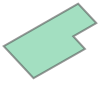

In [61]:
from shapely.geometry import Polygon
import numpy as np

print(records[0])
print(shapes[0].points)
pts_np = np.array(shapes[0].points)
print(pts_np[:, 0].mean(), pts_np[:, 1].mean())
print(pts_np[:, 1].mean())
Polygon(shapes[0].points)


In [26]:
import pandas as pd

In [28]:
df = pd.DataFrame(records)

In [49]:
df.columns =['Id', 'area_m', 'IIDD', 'NEAR_FID', 'NEAR_DIST', 'NEAR_X', 'NEAR_Y', "NEAR_ANGLE"]

In [50]:
df.head()

,Id,area_m,IIDD,NEAR_FID,NEAR_DIST,NEAR_X,NEAR_Y,NEAR_ANGLE
0,0,326.761001,0.0,234920,0.000034,-75.924082,38.803475,119.693861
1,1,71.187956,1.0,233438,0.000141,-75.906349,38.800582,-117.761328
2,2,103.188035,2.0,235855,0.000088,-75.900442,38.805465,62.812527
3,3,139.193976,3.0,244528,0.000082,-75.864139,38.820742,134.193071
4,4,357.343938,4.0,241309,0.000115,-75.855429,38.815374,40.060784


In [39]:
from dbfread import DBF

In [40]:
dbf = DBF(r'K:\OneDrive_NJIT\OneDrive - NJIT\Research\House\maryland\location_Kim_pop.dbf', encoding='iso-8859-1') 

In [42]:
dbf_df =pd.DataFrame(iter(dbf))

In [51]:
dbf_df['NEAR_FID'] = dbf_df.index

In [52]:
dbf_df.iloc[-10:]

,FID_locati,JURSCODE,ACCTID,story,material,Latitude,Longitude,FID_ACS_20,ACS_2017_5,ACS_2017_6,ACS_2017_7,ACS_2017_8,ACS_2017_9,X00_COUNTS,X00_COUN_1,X00_COUN_2,total_pop,FID,NEAR_FID
1562630,19884,ALLE,105031982.0,2.0,Siding,39.722619,-78.721926,3494,000300,240010003001,0.305669,0.001409,15000US240010003001,15000US240010003001,134.0,52.0,1363,1562630,1562630
1562631,12058,ALLE,120011513.0,1.0,Brick,39.722630,-78.781934,972,001502,240010015021,0.267556,0.002498,15000US240010015021,15000US240010015021,255.0,120.0,1902,1562631,1562631
1562632,348,ALLE,120002565.0,1.0,Frame,39.722631,-78.776613,972,001502,240010015021,0.267556,0.002498,15000US240010015021,15000US240010015021,255.0,120.0,1902,1562632,1562632
1562633,8361,ALLE,134010463.0,2.0,Frame,39.722637,-78.693085,3866,000200,240010002002,0.398168,0.004991,15000US240010002002,15000US240010002002,99.0,49.0,1013,1562633,1562633
1562634,8362,ALLE,134005141.0,2.0,Siding,39.722637,-78.690063,3866,000200,240010002002,0.398168,0.004991,15000US240010002002,15000US240010002002,99.0,49.0,1013,1562634,1562634
1562635,7135,ALLE,120012587.0,2.0,Brick,39.722774,-78.777926,972,001502,240010015021,0.267556,0.002498,15000US240010015021,15000US240010015021,255.0,120.0,1902,1562635,1562635
1562636,18020,ALLE,120004398.0,1.0,Siding,39.722878,-78.776631,972,001502,240010015021,0.267556,0.002498,15000US240010015021,15000US240010015021,255.0,120.0,1902,1562636,1562636
1562637,8346,ALLE,120013435.0,2.0,Siding,39.722879,-78.780020,972,001502,240010015021,0.267556,0.002498,15000US240010015021,15000US240010015021,255.0,120.0,1902,1562637,1562637
1562638,18019,ALLE,120005904.0,2.0,Siding,39.722883,-78.776250,972,001502,240010015021,0.267556,0.002498,15000US240010015021,15000US240010015021,255.0,120.0,1902,1562638,1562638
1562639,1173,ALLE,113012040.0,1.5,Siding,39.722886,-78.845524,3491,001503,240010015031,0.220956,0.001293,15000US240010015031,15000US240010015031,92.0,39.0,529,1562639,1562639


In [63]:
len(merged)

1200259

In [ ]:
merged = pd.merge(df, dbf_df, on='NEAR_FID')

In [64]:
merged.head()

,Id,area_m,IIDD,NEAR_FID,NEAR_DIST,NEAR_X,NEAR_Y,NEAR_ANGLE,FID_locati,JURSCODE,...,ACS_2017_5,ACS_2017_6,ACS_2017_7,ACS_2017_8,ACS_2017_9,X00_COUNTS,X00_COUN_1,X00_COUN_2,total_pop,FID
0,0,326.761001,0.0,234920,0.000034,-75.924082,38.803475,119.693861,1470342,TALB,...,960100,240419601001,0.619781,0.010411,15000US240419601001,15000US240419601001,186.0,83.0,1861,234920
1,1,71.187956,1.0,233438,0.000141,-75.906349,38.800582,-117.761328,586901,CARO,...,955400,240119554002,0.343141,0.005224,15000US240119554002,15000US240119554002,196.0,69.0,1404,233438
2,406248,282.023503,406248.0,233438,0.000003,-75.906349,38.800582,32.186794,586901,CARO,...,955400,240119554002,0.343141,0.005224,15000US240119554002,15000US240119554002,196.0,69.0,1404,233438
3,2,103.188035,2.0,235855,0.000088,-75.900442,38.805465,62.812527,587032,CARO,...,955400,240119554002,0.343141,0.005224,15000US240119554002,15000US240119554002,196.0,69.0,1404,235855
4,3,139.193976,3.0,244528,0.000082,-75.864139,38.820742,134.193071,591246,CARO,...,955400,240119554002,0.343141,0.005224,15000US240119554002,15000US240119554002,196.0,69.0,1404,244528


In [68]:
import numpy as np
with open(r'K:\OneDrive_NJIT\OneDrive - NJIT\Research\House\maryland\footprints\building_attri2.csv', 'w') as f:
    f.write(f"FID,area_m,ACCTID,story,GEOID,tract_pop,lon,lat,Polygon\n" )
    for i in range(len(shapes[:])):
        pts = shapes[i].points
        p = Polygon(shapes[i].points)
        pts_np = np.array(pts)
        lon = pts_np[:, 0].mean()
        lat = pts_np[:, 1].mean()
        f.write(f"{int(records[i]['IIDD'])},{records[i]['area_m']},{int(records[i]['ACCTID'])},{records[i]['story']},{records[i]['ACS_2017_6']},{records[i]['total_pop']},{lon},{lat},\"{str(p)}\"\n" )

In [1]:
import pandas as pd
df = pd.read_csv(r'K:\OneDrive_NJIT\OneDrive - NJIT\Research\House\maryland\footprints\building_attri2.csv')

In [3]:
df.groupby('story')

In [5]:
df.groupby('story').count()

,FID,area_m,ACCTID,GEOID,tract_pop,lon,lat,Polygon
story,,,,,,,,
1.0,365936,365936,365936,365936,365936,365936,365936,365936
1.5,138648,138648,138648,138648,138648,138648,138648,138648
2.0,670318,670318,670318,670318,670318,670318,670318,670318
2.5,16759,16759,16759,16759,16759,16759,16759,16759
3.0,8415,8415,8415,8415,8415,8415,8415,8415
4.0,183,183,183,183,183,183,183,183


In [6]:
import glob
folder = r'I:\Research\House\images\1.0\*.jpg'
files = glob.glob(folder)
print(len(files))

44372


In [8]:
import random
files_sub = random.sample(files, 4000)
print(len(files_sub))

4000


In [9]:
f_list = open(r'I:\Research\House\images\story1_4000.txt', 'w')

In [10]:
for f in files_sub:
    f_list.writelines(f + '\n')
f_list.close()

In [11]:
import os
import shutil
to = r'I:\Research\House\images\Huan_net'
for f in files_sub:
    base_name = os.path.basename(f)
    shutil.copyfile(f, os.path.join(to, base_name))
 


In [2]:
import pandas as pd
labels = pd.read_csv(r'K:\OneDrive_NJIT\OneDrive - NJIT\Research\House\maryland\labels2.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
len(labels)

2336270

In [5]:
labels.head()

,#,ACCTID,class,label text
0,1,111004210,3,residential2
1,2,111004229,0,Cannot tell
2,3,108018499,0,Cannot tell
3,4,108012660,2,residential1.5
4,5,108018480,0,Cannot tell


In [7]:
labels.groupby('label text').count()

,#,ACCTID,class
label text,,,
Cannot tell,593398,593398,593398
commercial1,32120,32120,32120
commercial1.5,648,648,648
commercial2,13954,13954,13954
commercial2.5,120,120,120
commercial3,4437,4437,4437
commercial4,916,916,916
commercial> 4,980,980,980
residential1,412849,412849,412849
